# Bigmart Sales Data predictor


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
trainData = pd.read_csv("bigmart-sales-data/Train.csv")
testData = pd.read_csv("bigmart-sales-data/Test.csv")


## Having a look at the data and the features...

Some of the features may be redundant or might not actually contribute significantly to the sales. To find out more, we look more at the features, their possible values to know more about the data.


In [3]:
print(trainData.head())
print(trainData.shape)

#print(testData.head())
print(testData.shape)

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [4]:
features = trainData.columns.to_list()
print(features)


['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']


The identifier of an item might not affect the sales. So, it might be safe to drop these columns

In [5]:
badCols = ['Item_Identifier','Outlet_identifier']


df = trainData.drop(trainData.columns[[0,6,4]],axis=1)
df.head(20)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650,Regular,0.012741,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528
7,NaN,Low Fat,0.127470,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200,Regular,0.016687,96.9726,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,19.200,Regular,0.094450,187.8214,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## Continuous and discrete features...

The features can be divided into two sets,

Continuous : {item wght,item visibility,item MRP,est year}

Discrete: {item fat cont,item type,outlet size,outlet location,outlet type}



In [6]:
discCols = ['Item_Fat_Content','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
contCols = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']

#Lets look at the discrete features...
for column in discCols:
    print("\t"+column)
    print(df[column].unique())
    print("\n\n")


#Lets look at the continuous features...
print("\t\t\tMAX \t\t MIN")
for column in contCols:
    print(column +"\t"+ str(df[column].max())+"\t"+str(df[column].min()))

	Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']



	Outlet_Size
['Medium' nan 'High' 'Small']



	Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']



	Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



			MAX 		 MIN
Item_Weight	21.35	4.555
Item_Visibility	0.328390948	0.0
Item_MRP	266.8884	31.29
Outlet_Establishment_Year	2009	1985


Out of all discrete features, only outlet size contains "NaN" or incomplete data. Item fat content unique values looks sketchy as "Low Fat", "low fat" and "LF" might mean the same thing just like "reg" and "Regular".

Another interesting point is that visibility is already normalised(in between 0 to 1)
There is the establishment year which although is discrete, can be used in regression (maybe) in form of time-series


Speaking of which, continuous features might have NaNs too, so lets find out which features and how many of them have NaNs in them.

In [7]:
df.isnull().sum(axis = 0)

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The dataset is of 8k examples and we have 2k NaNs, need a way to fill the NaNs as dropping is not that great solution.

In [8]:
relList = ['Item_Weight','Item_Fat_Content','Item_MRP']

print(df[df['Item_Weight'].isna()][:])

      Item_Weight Item_Fat_Content  Item_Visibility  Item_MRP  \
7             NaN          Low Fat         0.127470  107.7622   
18            NaN          Low Fat         0.034238  113.2834   
21            NaN          Regular         0.035400  144.5444   
23            NaN          Low Fat         0.057557  107.6938   
29            NaN          Regular         0.072222   43.6454   
36            NaN          Regular         0.059512  128.0678   
38            NaN          Regular         0.123111   36.9874   
39            NaN          Low Fat         0.026481   87.6198   
49            NaN          Regular         0.255395  196.8794   
59            NaN          Low Fat         0.061082  180.0344   
62            NaN          Low Fat         0.012090   38.2848   
63            NaN          Regular         0.150286   51.0692   
64            NaN          Low Fat         0.026016  255.8356   
77            NaN          Low Fat         0.113720   89.9804   
83            NaN        

As we can see, a lot of low fat items have NaNs in their weights, so we try to find a mean weight for each item fat content type and fill the same into the NaNs

In [9]:
print(df[df['Item_Weight'].notna()][:])

      Item_Weight Item_Fat_Content  Item_Visibility  Item_MRP  \
0           9.300          Low Fat         0.016047  249.8092   
1           5.920          Regular         0.019278   48.2692   
2          17.500          Low Fat         0.016760  141.6180   
3          19.200          Regular         0.000000  182.0950   
4           8.930          Low Fat         0.000000   53.8614   
5          10.395          Regular         0.000000   51.4008   
6          13.650          Regular         0.012741   57.6588   
8          16.200          Regular         0.016687   96.9726   
9          19.200          Regular         0.094450  187.8214   
10         11.800          Low Fat         0.000000   45.5402   
11         18.500          Regular         0.045464  144.1102   
12         15.100          Regular         0.100014  145.4786   
13         17.600          Regular         0.047257  119.6782   
14         16.350          Low Fat         0.068024  196.4426   
15          9.000        

In [10]:
tempdf = df.loc[ (( df[ 'Item_Fat_Content' ] == "Low Fat") | (df[ 'Item_Fat_Content' ] == "low fat") | (df[ 'Item_Fat_Content' ] == "LF") ) & ( df[ 'Item_Weight' ].notna())]

In [11]:
tempdf


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,17.500,Low Fat,0.016760,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,8.930,Low Fat,0.000000,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
10,11.800,Low Fat,0.000000,45.5402,1999,Medium,Tier 1,Supermarket Type1,1516.0266
14,16.350,Low Fat,0.068024,196.4426,1987,High,Tier 3,Supermarket Type1,1977.4260
16,11.800,Low Fat,0.008596,115.3492,2009,Medium,Tier 3,Supermarket Type2,1621.8888
19,13.350,Low Fat,0.102492,230.5352,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,14.600,Low Fat,0.025698,196.5084,2004,Small,Tier 2,Supermarket Type1,1587.2672
25,13.000,Low Fat,0.099887,45.9060,2007,NaN,Tier 2,Supermarket Type1,838.9080
27,11.650,low fat,0.019356,39.1164,1987,High,Tier 3,Supermarket Type1,308.9312


12.937387209811652
4.6537866380143145


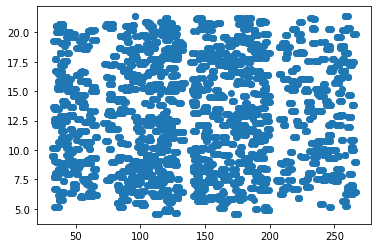

In [12]:
print(tempdf['Item_Weight'].mean())
print(tempdf['Item_Weight'].std())
tempdf.sort_values('Item_MRP')
plt.scatter(list(tempdf['Item_MRP']),list(tempdf['Item_Weight']))
plt.show()

Low Fat mean weight = 12.937387209811652 +- 4.65378

Regular fat mean weight = 12.711653969526864 +- 4.62158

No specific correlation can be seen in Item weight and item MRP. Also, low fat and regular fat mean weights are aprroximately the same so we can fill the same mean into all NaN item weights.

In [13]:
values={'Item_Weight':(12.937387209811652+12.711653969526864)/2}
filledDF = df.fillna(value=values)

In [14]:
filledDF.isna().sum(axis=0)


Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item weight is handled for null values. Now, moving to outlet size NaNs...

In [15]:
#update tempdf to now look into outlet size...
tempdf = filledDF
filledDF.isna().sum(axis=0)
tempdf.dropna(inplace=True)

tempdf.shape


(6113, 9)

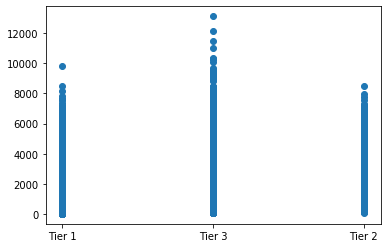

In [16]:
plt.scatter(list(tempdf['Outlet_Location_Type']),list(tempdf['Item_Outlet_Sales']))

In [17]:

finalDF = tempdf
for feature in discCols:
    print(finalDF[feature].unique())
finalDF.isna().sum(axis=0)



['Low Fat' 'Regular' 'low fat' 'reg' 'LF']
['Medium' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Supermarket Type3'
 'Grocery Store']


Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Discrete features have similar names which need to be changed to numerical values to be used in regression. 
Item_fat_content is ordinal in nature...so we can keep:
0: Low Fat/LF/low fat
1: Regular/reg
to indicate the increase in fat in terms of the number.

The same goes for Outlet size,Outlet Location

We can use one hot encoding for outlet type as it does not specify an inherent order


In [18]:
OLTcats = pd.Categorical(finalDF['Outlet_Type'])

print(OLTcats)

[Supermarket Type1, Supermarket Type2, Supermarket Type1, Supermarket Type1, Supermarket Type2, ..., Supermarket Type1, Supermarket Type1, Supermarket Type1, Supermarket Type2, Supermarket Type1]
Length: 6113
Categories (4, object): [Grocery Store, Supermarket Type1, Supermarket Type2, Supermarket Type3]


In [19]:
dfDummies = pd.get_dummies(OLTcats, prefix = 'category')

print(dfDummies.shape)
print(finalDF.shape)


(6113, 4)
(6113, 9)


In [20]:
#DF concat generates 1700+ NaNs to solve this i added index resetting...

anotherDF = pd.concat([ finalDF.reset_index(drop=True) , dfDummies.reset_index(drop=True) ],axis=1)




In [21]:

anotherDF.isna().sum()

Item_Weight                   0
Item_Fat_Content              0
Item_Visibility               0
Item_MRP                      0
Outlet_Establishment_Year     0
Outlet_Size                   0
Outlet_Location_Type          0
Outlet_Type                   0
Item_Outlet_Sales             0
category_Grocery Store        0
category_Supermarket Type1    0
category_Supermarket Type2    0
category_Supermarket Type3    0
dtype: int64

In [22]:
targets = anotherDF['Item_Outlet_Sales'].copy()
anotherDF.drop(axis=1,columns=['Item_Outlet_Sales'],inplace=True)
anotherDF.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,category_Grocery Store,category_Supermarket Type1,category_Supermarket Type2,category_Supermarket Type3
0,9.300,Low Fat,0.016047,249.8092,1999,Medium,Tier 1,Supermarket Type1,0,1,0,0
1,5.920,Regular,0.019278,48.2692,2009,Medium,Tier 3,Supermarket Type2,0,0,1,0
2,17.500,Low Fat,0.016760,141.6180,1999,Medium,Tier 1,Supermarket Type1,0,1,0,0
3,8.930,Low Fat,0.000000,53.8614,1987,High,Tier 3,Supermarket Type1,0,1,0,0
4,10.395,Regular,0.000000,51.4008,2009,Medium,Tier 3,Supermarket Type2,0,0,1,0


In [23]:
targets.head(10)


0    3735.1380
1     443.4228
2    2097.2700
3     994.7052
4     556.6088
5     343.5528
6    4022.7636
7    1516.0266
8    2187.1530
9    1589.2646
Name: Item_Outlet_Sales, dtype: float64